In [1]:
import pandas as pd
import numpy as np

In [2]:
drugcomb = pd.read_csv('./drugcomb_after_clean.csv',index_col=0)

In [3]:
drugcomb

,drug_row,drug_col,ModelID,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,cell_line_name
0,(+)-Bicuculline,temozolomide,ACH-000571,0.000022,0.000200,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,T98G
3,(+)-PD 128907 hydrochloride,temozolomide,ACH-000571,0.000022,0.000200,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,T98G
4,(+)-Usnic acid,717906-29-1,ACH-000052,0.353523,3.231721,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848,A-673
5,(+)-Usnic acid,Ruxolitinib,ACH-000702,4.000000,0.079907,-71.949000,9.755000,10.775000,3.040000,6.907500,69.101500,38.004500,-2.847500,65.623482,-6.188270,-4.539872,58.121787,L-1236
6,(+)-Usnic acid,temozolomide,ACH-000571,0.000022,0.000200,-9.231525,17.392589,18.131748,18.131748,18.131748,9.970683,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,T98G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647087,zidovudine,temozolomide,ACH-000571,0.000022,0.000200,-6.954379,17.392589,28.028609,28.028609,28.028609,17.590399,22.809504,10.636020,16.380852,10.635918,10.636020,16.380852,T98G
647088,zolmitriptan,717906-29-1,ACH-000052,0.025153,3.203650,-0.587000,24.420000,50.618000,24.966000,37.792000,13.959000,25.875500,13.372000,0.894137,-6.822072,-1.372381,1.381809,A-673
647089,zolmitriptan,Ruxolitinib,ACH-000702,0.018596,0.100050,8.824000,41.705000,56.235000,52.241000,54.238000,3.709000,28.973500,12.533000,1.689780,-20.404494,4.352546,2.732565,L-1236
647090,zolmitriptan,temozolomide,ACH-000571,0.000022,0.000200,0.698224,17.392589,19.139593,19.139593,19.139593,1.048779,10.094186,1.747003,1.170219,1.746901,1.747003,1.170219,T98G


In [4]:
cellmap = np.load('./Cell_map_haveomics.npy',allow_pickle=True)

In [5]:
cellmap 

array({'ACH-000421': 0, 'ACH-000008': 1, 'ACH-000754': 2, 'ACH-000117': 3, 'ACH-000017': 4, 'ACH-000587': 5, 'ACH-000785': 6, 'ACH-000276': 7, 'ACH-000392': 8, 'ACH-000856': 9, 'ACH-000376': 10, 'ACH-000880': 11, 'ACH-000035': 12, 'ACH-000322': 13, 'ACH-000552': 14, 'ACH-000223': 15, 'ACH-000971': 16, 'ACH-000019': 17, 'ACH-000481': 18, 'ACH-000338': 19, 'ACH-000428': 20, 'ACH-000530': 21, 'ACH-000002': 22, 'ACH-000702': 23, 'ACH-000943': 24, 'ACH-000164': 25, 'ACH-000681': 26, 'ACH-000997': 27, 'ACH-000571': 28, 'ACH-000714': 29, 'ACH-000511': 30, 'ACH-000374': 31, 'ACH-000148': 32, 'ACH-000403': 33, 'ACH-000876': 34, 'ACH-000668': 35, 'ACH-000713': 36, 'ACH-000273': 37, 'ACH-000793': 38, 'ACH-000551': 39, 'ACH-000486': 40, 'ACH-000655': 41, 'ACH-000568': 42, 'ACH-000680': 43, 'ACH-000111': 44, 'ACH-000614': 45, 'ACH-000396': 46, 'ACH-000906': 47, 'ACH-000348': 48, 'ACH-000621': 49, 'ACH-000504': 50, 'ACH-000956': 51, 'ACH-000007': 52, 'ACH-000028': 53, 'ACH-000665': 54, 'ACH-000572':

In [6]:
if isinstance(cellmap, np.ndarray) and cellmap.ndim == 0:
    cellmap = cellmap.item()  

In [7]:
cell_list=list(cellmap.keys())

In [8]:
len(cell_list)

161

In [9]:
filtered_df_cell = drugcomb[
    (drugcomb["ModelID"].isin(cell_list))
]

In [10]:
filtered_df_cell

,drug_row,drug_col,ModelID,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,cell_line_name
0,(+)-Bicuculline,temozolomide,ACH-000571,0.000022,0.000200,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,T98G
3,(+)-PD 128907 hydrochloride,temozolomide,ACH-000571,0.000022,0.000200,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,T98G
4,(+)-Usnic acid,717906-29-1,ACH-000052,0.353523,3.231721,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848,A-673
5,(+)-Usnic acid,Ruxolitinib,ACH-000702,4.000000,0.079907,-71.949000,9.755000,10.775000,3.040000,6.907500,69.101500,38.004500,-2.847500,65.623482,-6.188270,-4.539872,58.121787,L-1236
6,(+)-Usnic acid,temozolomide,ACH-000571,0.000022,0.000200,-9.231525,17.392589,18.131748,18.131748,18.131748,9.970683,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,T98G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647087,zidovudine,temozolomide,ACH-000571,0.000022,0.000200,-6.954379,17.392589,28.028609,28.028609,28.028609,17.590399,22.809504,10.636020,16.380852,10.635918,10.636020,16.380852,T98G
647088,zolmitriptan,717906-29-1,ACH-000052,0.025153,3.203650,-0.587000,24.420000,50.618000,24.966000,37.792000,13.959000,25.875500,13.372000,0.894137,-6.822072,-1.372381,1.381809,A-673
647089,zolmitriptan,Ruxolitinib,ACH-000702,0.018596,0.100050,8.824000,41.705000,56.235000,52.241000,54.238000,3.709000,28.973500,12.533000,1.689780,-20.404494,4.352546,2.732565,L-1236
647090,zolmitriptan,temozolomide,ACH-000571,0.000022,0.000200,0.698224,17.392589,19.139593,19.139593,19.139593,1.048779,10.094186,1.747003,1.170219,1.746901,1.747003,1.170219,T98G


In [11]:
filtered_df_cell.to_csv('./drugcomb_after_clean_omics.csv',index=False)

In [12]:
synergy_data=filtered_df_cell

In [13]:
cellmap = np.load('./Cell_map_haveomics.npy',allow_pickle=True)

In [14]:
cellmap

array({'ACH-000421': 0, 'ACH-000008': 1, 'ACH-000754': 2, 'ACH-000117': 3, 'ACH-000017': 4, 'ACH-000587': 5, 'ACH-000785': 6, 'ACH-000276': 7, 'ACH-000392': 8, 'ACH-000856': 9, 'ACH-000376': 10, 'ACH-000880': 11, 'ACH-000035': 12, 'ACH-000322': 13, 'ACH-000552': 14, 'ACH-000223': 15, 'ACH-000971': 16, 'ACH-000019': 17, 'ACH-000481': 18, 'ACH-000338': 19, 'ACH-000428': 20, 'ACH-000530': 21, 'ACH-000002': 22, 'ACH-000702': 23, 'ACH-000943': 24, 'ACH-000164': 25, 'ACH-000681': 26, 'ACH-000997': 27, 'ACH-000571': 28, 'ACH-000714': 29, 'ACH-000511': 30, 'ACH-000374': 31, 'ACH-000148': 32, 'ACH-000403': 33, 'ACH-000876': 34, 'ACH-000668': 35, 'ACH-000713': 36, 'ACH-000273': 37, 'ACH-000793': 38, 'ACH-000551': 39, 'ACH-000486': 40, 'ACH-000655': 41, 'ACH-000568': 42, 'ACH-000680': 43, 'ACH-000111': 44, 'ACH-000614': 45, 'ACH-000396': 46, 'ACH-000906': 47, 'ACH-000348': 48, 'ACH-000621': 49, 'ACH-000504': 50, 'ACH-000956': 51, 'ACH-000007': 52, 'ACH-000028': 53, 'ACH-000665': 54, 'ACH-000572':

In [15]:
drugmap= np.load('./Drug_map.npy',allow_pickle=True)

In [16]:
drugmap

array({'(+)-Bicuculline': 0, '(+)-PD 128907 hydrochloride': 1, '(+)-Usnic acid': 2, '(-)-Blebbistatin': 3, '(-)-Epigallocatechin gallate': 4, '(-)-Ethyl apovincaminate': 5, '(-)-MK 801 Maleate': 6, '(-)-Rapamycin': 7, '(-)-chlorpheniramine': 8, '(-)-huperzine A': 9, '(3S,4R)-Tofacitinib': 10, '(E/Z)-ferulic acid': 11, '(Phenylindolyl)maleimide deriv. 79': 12, '(R)-(-)-Rolipram': 13, '(R)-Bicalutamide': 14, '(S)-(+)-rolipram': 15, '.beta.,.beta.-Carotene': 16, '001, RAD': 17, '1,25-dihydroxy vitamin D3': 18, '1-(1-Naphthylmethyl)piperazine': 19, '1-DOCOSANOL': 20, '1-Hexadecanol': 21, '1-Methyl-D-tryptophan': 22, '1-beta-D-Xylofuranosyluracil': 23, '10-Hydroxycamptothecin': 24, '10-epi-Aclacinomycin A': 25, '1001645-58-4': 26, '10030-85-0': 27, '10058-F4': 28, '10074-G5': 29, '1032350-13-2': 30, '10356-76-0': 31, '10402-53-6': 32, '1047953-91-2': 33, '1062368-24-4': 34, '1072959-67-1': 35, '1080622-86-1': 36, '1095382-05-0': 37, '1096708-71-2': 38, '11-cis Retinoic Acid': 39, '110025-28

In [17]:
cellmap_dict = cellmap.item()  # 提取字典对象
drugmap_dict = drugmap.item()

In [18]:
synergy_data['drug_row'] =synergy_data['drug_row'].map(drugmap_dict)
synergy_data['drug_col'] = synergy_data['drug_col'].map(drugmap_dict)
synergy_data['ModelID'] = synergy_data['ModelID'].map(cellmap_dict)

C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\3065998577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synergy_data['drug_row'] =synergy_data['drug_row'].map(drugmap_dict)
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\3065998577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synergy_data['drug_col'] = synergy_data['drug_col'].map(drugmap_dict)
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\3065998577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [19]:
synergy_data

,drug_row,drug_col,ModelID,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,cell_line_name
0,0,3031,28,0.000022,0.000200,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,T98G
3,1,3031,28,0.000022,0.000200,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,T98G
4,2,3107,160,0.353523,3.231721,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848,A-673
5,2,2030,23,4.000000,0.079907,-71.949000,9.755000,10.775000,3.040000,6.907500,69.101500,38.004500,-2.847500,65.623482,-6.188270,-4.539872,58.121787,L-1236
6,2,3031,28,0.000022,0.000200,-9.231525,17.392589,18.131748,18.131748,18.131748,9.970683,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,T98G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647087,3104,3031,28,0.000022,0.000200,-6.954379,17.392589,28.028609,28.028609,28.028609,17.590399,22.809504,10.636020,16.380852,10.635918,10.636020,16.380852,T98G
647088,3105,3107,160,0.025153,3.203650,-0.587000,24.420000,50.618000,24.966000,37.792000,13.959000,25.875500,13.372000,0.894137,-6.822072,-1.372381,1.381809,A-673
647089,3105,2030,23,0.018596,0.100050,8.824000,41.705000,56.235000,52.241000,54.238000,3.709000,28.973500,12.533000,1.689780,-20.404494,4.352546,2.732565,L-1236
647090,3105,3031,28,0.000022,0.000200,0.698224,17.392589,19.139593,19.139593,19.139593,1.048779,10.094186,1.747003,1.170219,1.746901,1.747003,1.170219,T98G


C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['row_drug_sensitivity'] = np.where(np.log(df['ic50_row']) < -2, 0, 1)
C:\Users\Yaoji\.conda\envs\python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['col_drug_sensitivity

行药物敏感性统计:
敏感(0): 115065
抗性(1): 259708

列药物敏感性统计:
敏感(0): 117112
抗性(1): 257661


C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:64: UserWarning: Glyph 25935 (\N{CJK UNIFIED IDEOGRAPH-654F}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:64: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:64: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:64: UserWarning: Glyph 25239 (\N{CJK UNIFIED IDEOGRAPH-6297}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:64: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:64: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) miss

敏感性分布图已保存为'drug_sensitivity_distribution.png'


C:\Users\Yaoji\.conda\envs\python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:83: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:83: UserWarning: Glyph 33647 (\N{CJK UNIFIED IDEOGRAPH-836F}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:83: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:83: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
C:\Users\Yaoji\AppData\Local\Temp\ipykernel_29644\4164303843.py:83: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAP

IC50分布图已保存为'ic50_distribution.png'


C:\Users\Yaoji\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yaoji\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yaoji\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yaoji\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33647 (\N{CJK UNIFIED IDEOGRAPH-836F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yaoji\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29289 (\

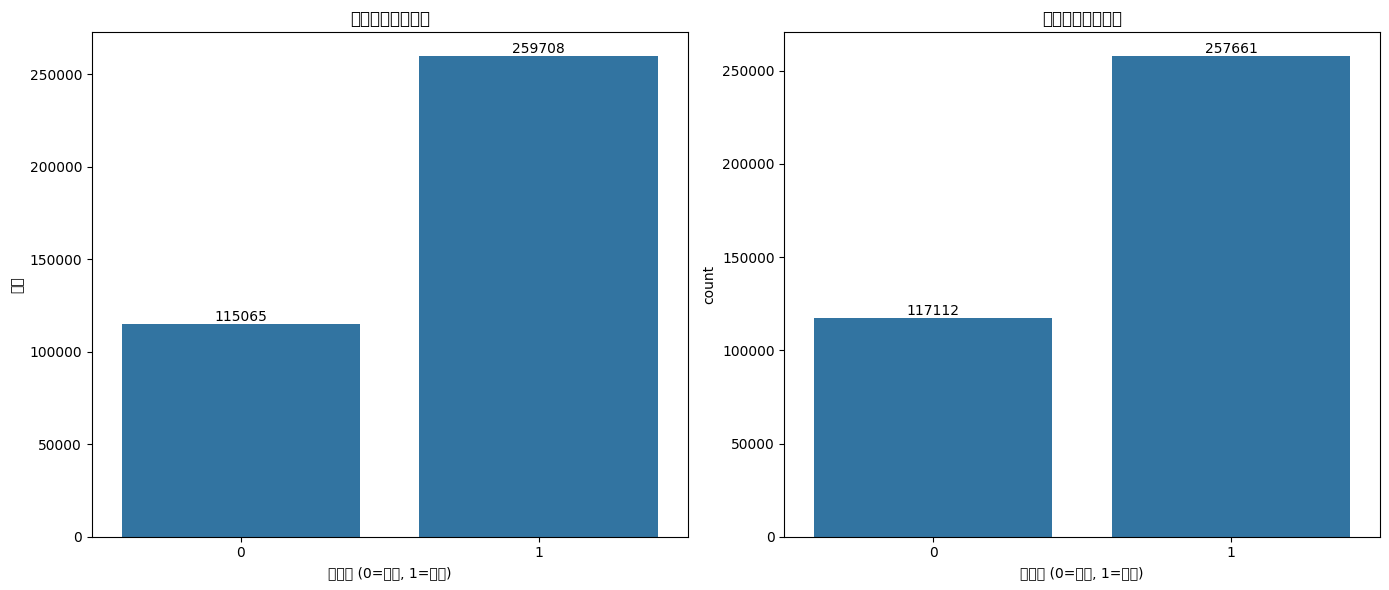

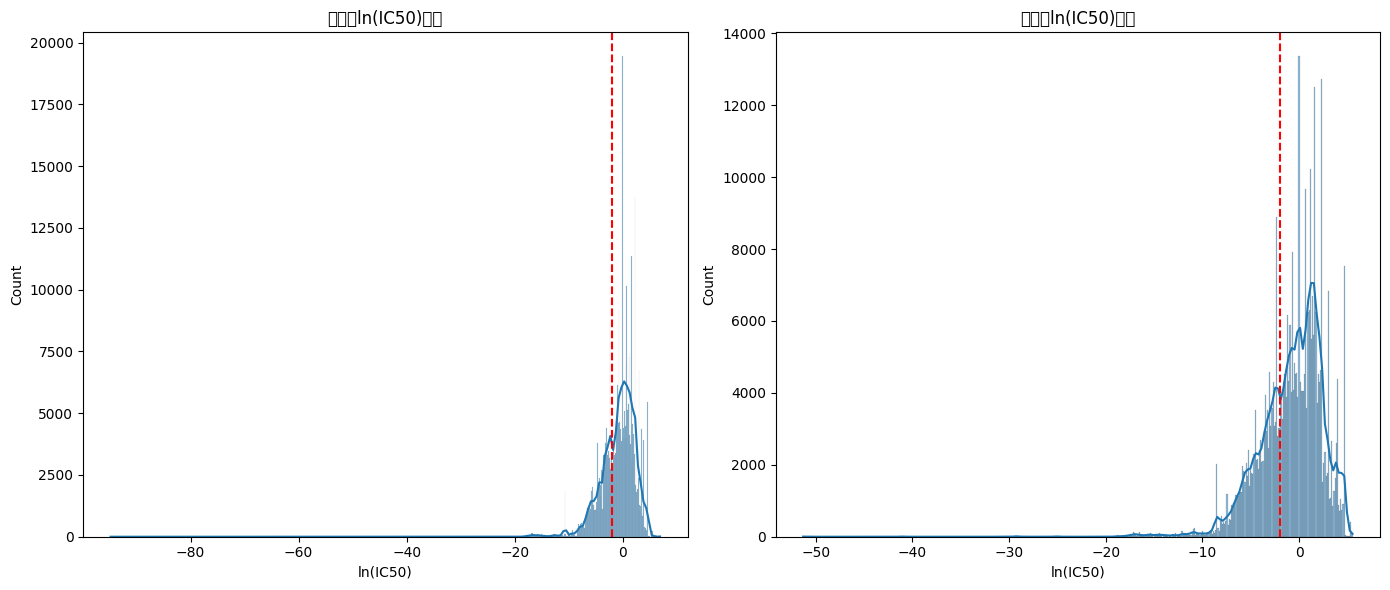

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
# 假设数据已保存为CSV文件，如果是其他格式请相应修改
def process_drug_sensitivity_data(oneil):
    # 读取数据
    df =oneil
    
    # 检查数据中的IC50列
    # 根据你的数据，ic50_row和ic50_col分别代表行药物和列药物的IC50值
    
    # 为行药物创建敏感性标签（0表示敏感，1表示抗性）
    df['row_drug_sensitivity'] = np.where(np.log(df['ic50_row']) < -2, 0, 1)
    
    # 为列药物创建敏感性标签（0表示敏感，1表示抗性）
    df['col_drug_sensitivity'] = np.where(np.log(df['ic50_col']) < -2, 0, 1)
    
    # 统计不同敏感性类别的数量
    row_sensitivity_count = df['row_drug_sensitivity'].value_counts()
    col_sensitivity_count = df['col_drug_sensitivity'].value_counts()
    
    print("行药物敏感性统计:")
    print(f"敏感(0): {row_sensitivity_count.get(0, 0)}")
    print(f"抗性(1): {row_sensitivity_count.get(1, 0)}")
    
    print("\n列药物敏感性统计:")
    print(f"敏感(0): {col_sensitivity_count.get(0, 0)}")
    print(f"抗性(1): {col_sensitivity_count.get(1, 0)}")
  
    return df

# 可视化敏感性分布
def visualize_sensitivity(df):
    plt.figure(figsize=(14, 6))
    
    # 行药物敏感性分布
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x='row_drug_sensitivity', data=df)
    plt.title('行药物敏感性分布')
    plt.ylabel('数量')
    plt.xlabel('敏感性 (0=敏感, 1=抗性)')
    
    # 添加数值标签
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom')
    
    # 列药物敏感性分布
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x='col_drug_sensitivity', data=df)
    plt.title('列药物敏感性分布')
    plt.xlabel('敏感性 (0=敏感, 1=抗性)')
    
    # 添加数值标签
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom')
    
    plt.tight_layout()
    plt.savefig('drug_sensitivity_distribution.png')
    print("敏感性分布图已保存为'drug_sensitivity_distribution.png'")
    
    # 分析IC50值的分布
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(np.log(df['ic50_row']), kde=True)
    plt.axvline(x=-2, color='r', linestyle='--')
    plt.title('行药物ln(IC50)分布')
    plt.xlabel('ln(IC50)')
    
    plt.subplot(1, 2, 2)
    sns.histplot(np.log(df['ic50_col']), kde=True)
    plt.axvline(x=-2, color='r', linestyle='--')
    plt.title('列药物ln(IC50)分布')
    plt.xlabel('ln(IC50)')
    
    plt.tight_layout()
    plt.savefig('ic50_distribution.png')
    print("IC50分布图已保存为'ic50_distribution.png'")

# 示例使用
if __name__ == "__main__":
    # 将数据路径替换为你的实际文件路径
    file_path = synergy_data
    
    try:
        # 处理数据
        processed_df = process_drug_sensitivity_data(file_path)
        
        # 可视化结果
        visualize_sensitivity(processed_df)
  
        
    except Exception as e:
        print(f"处理数据时发生错误: {e}")


In [22]:
processed_df

,drug_row,drug_col,ModelID,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,cell_line_name,row_drug_sensitivity,col_drug_sensitivity
0,0,3031,28,0.000022,0.000200,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,T98G,0,0
3,1,3031,28,0.000022,0.000200,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,T98G,0,0
4,2,3107,160,0.353523,3.231721,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848,A-673,1,1
5,2,2030,23,4.000000,0.079907,-71.949000,9.755000,10.775000,3.040000,6.907500,69.101500,38.004500,-2.847500,65.623482,-6.188270,-4.539872,58.121787,L-1236,1,0
6,2,3031,28,0.000022,0.000200,-9.231525,17.392589,18.131748,18.131748,18.131748,9.970683,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,T98G,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647087,3104,3031,28,0.000022,0.000200,-6.954379,17.392589,28.028609,28.028609,28.028609,17.590399,22.809504,10.636020,16.380852,10.635918,10.636020,16.380852,T98G,0,0
647088,3105,3107,160,0.025153,3.203650,-0.587000,24.420000,50.618000,24.966000,37.792000,13.959000,25.875500,13.372000,0.894137,-6.822072,-1.372381,1.381809,A-673,0,1
647089,3105,2030,23,0.018596,0.100050,8.824000,41.705000,56.235000,52.241000,54.238000,3.709000,28.973500,12.533000,1.689780,-20.404494,4.352546,2.732565,L-1236,0,0
647090,3105,3031,28,0.000022,0.000200,0.698224,17.392589,19.139593,19.139593,19.139593,1.048779,10.094186,1.747003,1.170219,1.746901,1.747003,1.170219,T98G,0,0


In [21]:
def assign_label(value):
    if value > 10:
        return 1
    elif value < -10:
        return 0
    else:
        return 2

# 添加 label 列
processed_df['label'] = processed_df['synergy_bliss'].apply(assign_label)

C:\Users\Yaoji\AppData\Local\Temp\ipykernel_28200\78502200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['label'] = processed_df['synergy_bliss'].apply(assign_label)


In [24]:
label_counts = processed_df['row_drug_sensitivity'].value_counts()

In [25]:
label_counts

1    259708
0    115065
Name: row_drug_sensitivity, dtype: int64

In [26]:
processed_df

,drug_row,drug_col,ModelID,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,cell_line_name,row_drug_sensitivity,col_drug_sensitivity
0,0,3031,28,0.000022,0.000200,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,T98G,0,0
3,1,3031,28,0.000022,0.000200,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,T98G,0,0
4,2,3107,160,0.353523,3.231721,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848,A-673,1,1
5,2,2030,23,4.000000,0.079907,-71.949000,9.755000,10.775000,3.040000,6.907500,69.101500,38.004500,-2.847500,65.623482,-6.188270,-4.539872,58.121787,L-1236,1,0
6,2,3031,28,0.000022,0.000200,-9.231525,17.392589,18.131748,18.131748,18.131748,9.970683,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,T98G,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647087,3104,3031,28,0.000022,0.000200,-6.954379,17.392589,28.028609,28.028609,28.028609,17.590399,22.809504,10.636020,16.380852,10.635918,10.636020,16.380852,T98G,0,0
647088,3105,3107,160,0.025153,3.203650,-0.587000,24.420000,50.618000,24.966000,37.792000,13.959000,25.875500,13.372000,0.894137,-6.822072,-1.372381,1.381809,A-673,0,1
647089,3105,2030,23,0.018596,0.100050,8.824000,41.705000,56.235000,52.241000,54.238000,3.709000,28.973500,12.533000,1.689780,-20.404494,4.352546,2.732565,L-1236,0,0
647090,3105,3031,28,0.000022,0.000200,0.698224,17.392589,19.139593,19.139593,19.139593,1.048779,10.094186,1.747003,1.170219,1.746901,1.747003,1.170219,T98G,0,0


In [27]:
processed_df.to_csv('./data_to_split.csv',index=False)